# Setup


In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Sentiment_LMX


Mounted at /content/drive/
/content/drive/MyDrive/Sentiment_LMX


In [2]:
import json
import os
import random
from datetime import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

from sentiment_lmx import (
    MapElites2D,
    compute_semantic_distance,
    compute_sentiment_score,
    create_crossover_prompt,
    do_crossover_fast,
    load_default_models,
    process_output,
    run_baseline_experiment,
)
from sentiment_lmx.metrics.analysis import count_repetitions, vocab_diversity
from sentiment_lmx.metrics.atlas import visualize_atlas
from sentiment_lmx.metrics.evolution import plot_evolution_curve


In [3]:
print("Loading models...")
generator, sentiment_analysis, embed = load_default_models()

Loading models...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/291 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

RobertaForSequenceClassification LOAD REPORT from: cardiffnlp/twitter-roberta-base-sentiment-latest
Key                             | Status     |  | 
--------------------------------+------------+--+-
roberta.pooler.dense.bias       | UNEXPECTED |  | 
roberta.pooler.dense.weight     | UNEXPECTED |  | 
roberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# Running the LMX --- with few demo sentences --- need to integrate a better dataset


README.md:   0%|          | 0.00/421 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


train.jsonl: 0.00B [00:00, ?B/s]

dev.jsonl: 0.00B [00:00, ?B/s]

test.jsonl: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/8544 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1101 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2210 [00:00<?, ? examples/s]

Filter:   0%|          | 0/8544 [00:00<?, ? examples/s]


[1/10] Using root sentence: 'clever but not especially compelling .'
Output dir: ./baseline_results_sst5_neutral_10/root_01_clever_but_not_especially_compelling

BASELINE EXPERIMENT
Root: clever but not especially compelling .
Target sentiment: positive
Temperature: 0.7
Generations: 50
Grid: 2020



Passing `generation_config` together with generation-related arguments=({'max_new_tokens', 'top_p', 'do_sample', 'temperature', 'repetition_penalty'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


   Grid: 2020 = 400 cells
   Target sentiment: positive
   Temperature: 0.7

RUNNING MAP-ELITES



Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen   0 | Evals:     9 | Coverage:   9/400 (  2.2%) | Sentiment: 0.184 (max: 0.557) | QD: 1.7


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co

Gen   5 | Evals:    49 | Coverage:  33/400 (  8.2%) | Sentiment: 0.368 (max: 0.922) | QD: 12.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  10 | Evals:    89 | Coverage:  48/400 ( 12.0%) | Sentiment: 0.387 (max: 0.927) | QD: 18.6


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  15 | Evals:   129 | Coverage:  61/400 ( 15.2%) | Sentiment: 0.412 (max: 0.927) | QD: 25.1


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  20 | Evals:   169 | Coverage:  73/400 ( 18.2%) | Sentiment: 0.411 (max: 0.927) | QD: 30.0


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  25 | Evals:   209 | Coverage:  83/400 ( 20.8%) | Sentiment: 0.411 (max: 0.927) | QD: 34.1


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  30 | Evals:   249 | Coverage:  90/400 ( 22.5%) | Sentiment: 0.414 (max: 0.927) | QD: 37.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  35 | Evals:   289 | Coverage:  92/400 ( 23.0%) | Sentiment: 0.424 (max: 0.927) | QD: 39.0


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  40 | Evals:   329 | Coverage:  97/400 ( 24.2%) | Sentiment: 0.434 (max: 0.927) | QD: 42.1


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  45 | Evals:   369 | Coverage: 102/400 ( 25.5%) | Sentiment: 0.442 (max: 0.927) | QD: 45.0


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen  49 | Evals:   401 | Coverage: 106/400 ( 26.5%) | Sentiment: 0.443 (max: 0.927) | QD: 47.0

 Evolution complete!
   Total evaluations: 401
   Final coverage: 106/400 cells
 Results exported to ./baseline_results_sst5_neutral_10/root_01_clever_but_not_especially_compelling/results_20260223_171842.json

CREATING VISUALIZATIONS

Atlas saved to ./baseline_results_sst5_neutral_10/root_01_clever_but_not_especially_compelling/atlas_20260223_171842.png


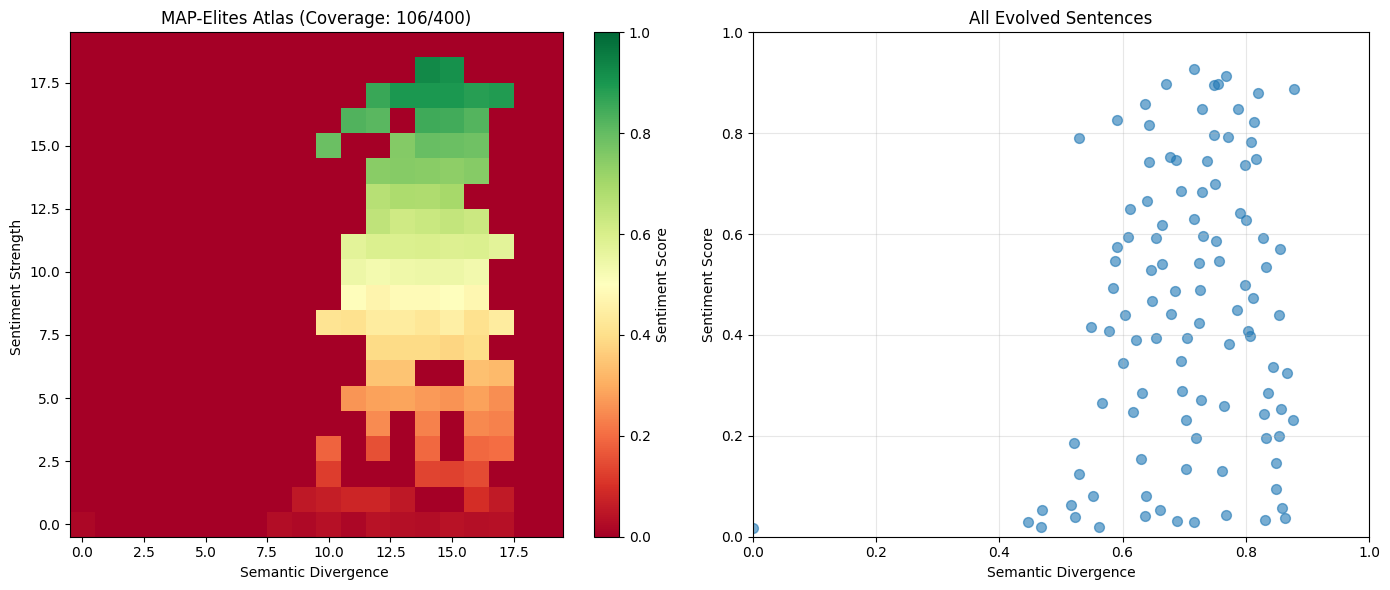

 Evolution curve saved to ./baseline_results_sst5_neutral_10/root_01_clever_but_not_especially_compelling/evolution_20260223_171842.png


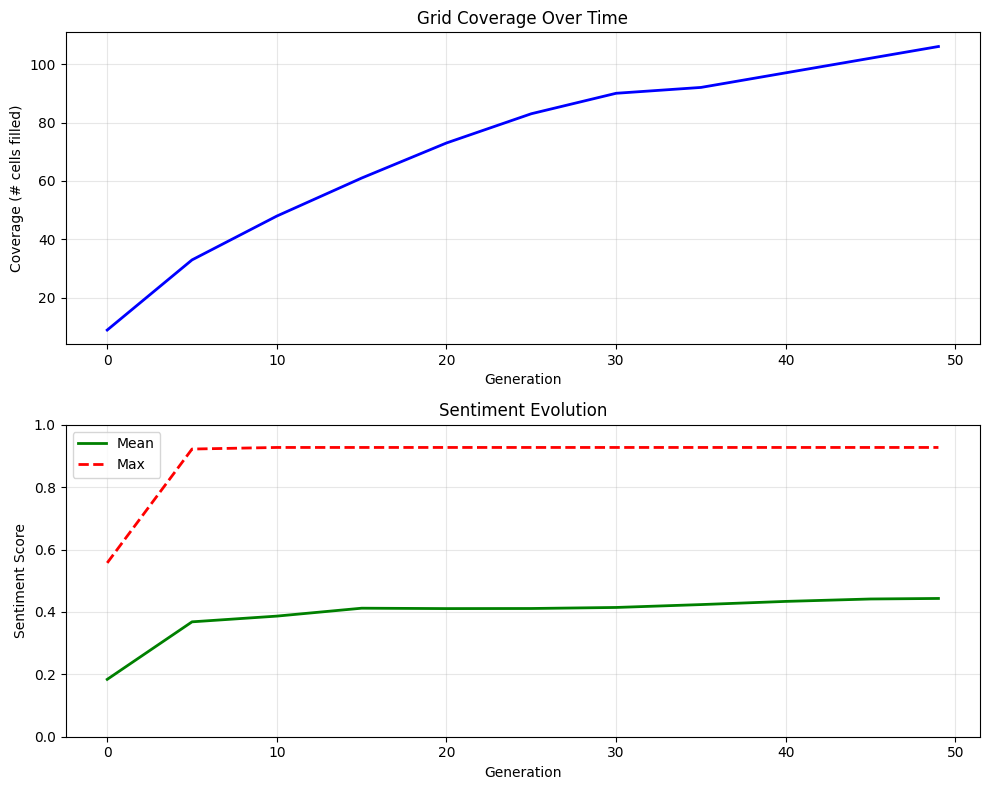

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



TOP 10 EVOLVED SENTENCES

 1. [0.927, 0.715] While each sentence is clever on its own, their true power lies in their ability to work together to create a captivating narrative that leaves the reader wanting more.
 2. [0.913, 0.768] Although each sentence seems ordinary on its own, when read together they create a powerful narrative, filled with depth, complexity, and intrigue, leaving the reader eager for more.
 3. [0.898, 0.671] While each sentence may be clever individually, but their greatest strength lies in how they combine to tell an engaging story or convey a multidimensional idea, sparking the reader's curiosity and keeping.
 4. [0.897, 0.755] Although individually the sentences may seem ordinary, when combined they create a captivating narrative that draws the reader in with their vivid imagery and emotional resonance, sparking curiosity and inspiring imagination.
 5. [0.895, 0.748] While each sentence may appear unremarkable on its own, their collective impact creates a cap

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen   0 | Evals:     9 | Coverage:   9/400 (  2.2%) | Sentiment: 0.225 (max: 0.893) | QD: 2.0


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen   5 | Evals:    49 | Coverage:  33/400 (  8.2%) | Sentiment: 0.173 (max: 0.893) | QD: 5.7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  10 | Evals:    89 | Coverage:  44/400 ( 11.0%) | Sentiment: 0.228 (max: 0.893) | QD: 10.0


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  15 | Evals:   129 | Coverage:  60/400 ( 15.0%) | Sentiment: 0.371 (max: 0.936) | QD: 22.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  20 | Evals:   169 | Coverage:  72/400 ( 18.0%) | Sentiment: 0.414 (max: 0.956) | QD: 29.8


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  25 | Evals:   209 | Coverage:  81/400 ( 20.2%) | Sentiment: 0.446 (max: 0.963) | QD: 36.1


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  30 | Evals:   249 | Coverage:  84/400 ( 21.0%) | Sentiment: 0.452 (max: 0.964) | QD: 38.0


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  35 | Evals:   289 | Coverage:  89/400 ( 22.2%) | Sentiment: 0.453 (max: 0.964) | QD: 40.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  40 | Evals:   329 | Coverage:  96/400 ( 24.0%) | Sentiment: 0.457 (max: 0.964) | QD: 43.9


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  45 | Evals:   369 | Coverage: 100/400 ( 25.0%) | Sentiment: 0.454 (max: 0.964) | QD: 45.4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen  49 | Evals:   401 | Coverage: 104/400 ( 26.0%) | Sentiment: 0.451 (max: 0.964) | QD: 46.9

 Evolution complete!
   Total evaluations: 401
   Final coverage: 104/400 cells
 Results exported to ./baseline_results_sst5_neutral_10/root_02_just_entertaining_enough_not_to_hate_too_mediocre_to_love/results_20260223_172121.json

CREATING VISUALIZATIONS

Atlas saved to ./baseline_results_sst5_neutral_10/root_02_just_entertaining_enough_not_to_hate_too_mediocre_to_love/atlas_20260223_172121.png


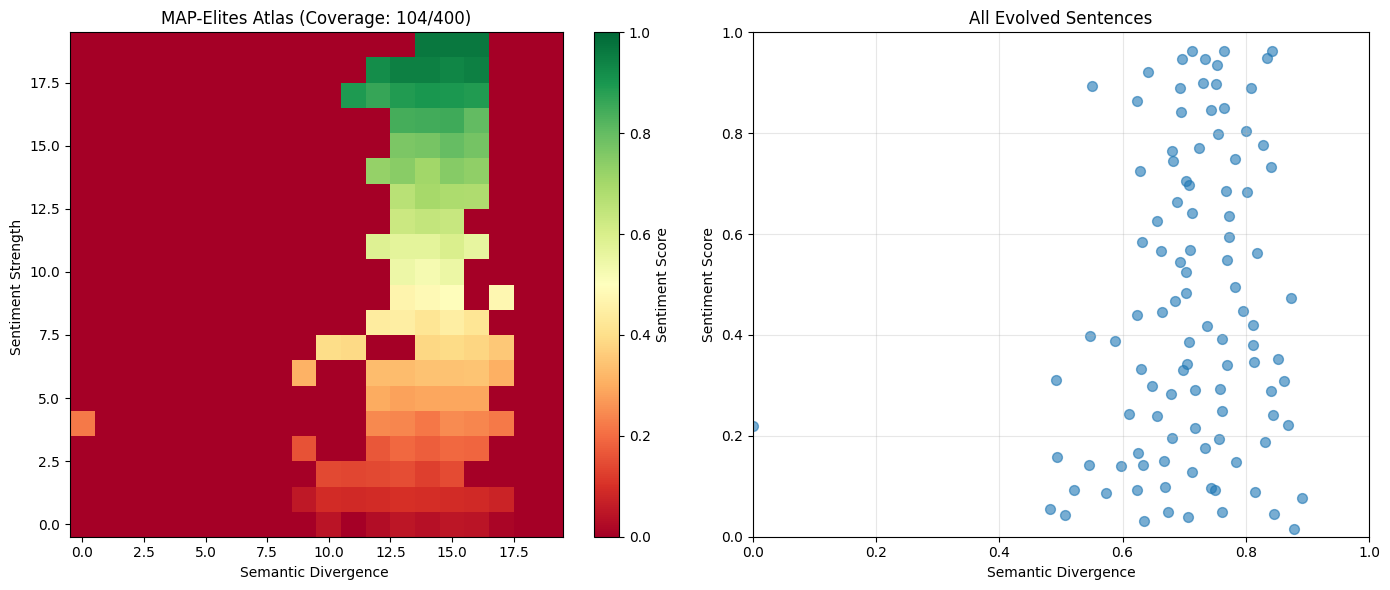

 Evolution curve saved to ./baseline_results_sst5_neutral_10/root_02_just_entertaining_enough_not_to_hate_too_mediocre_to_love/evolution_20260223_172121.png


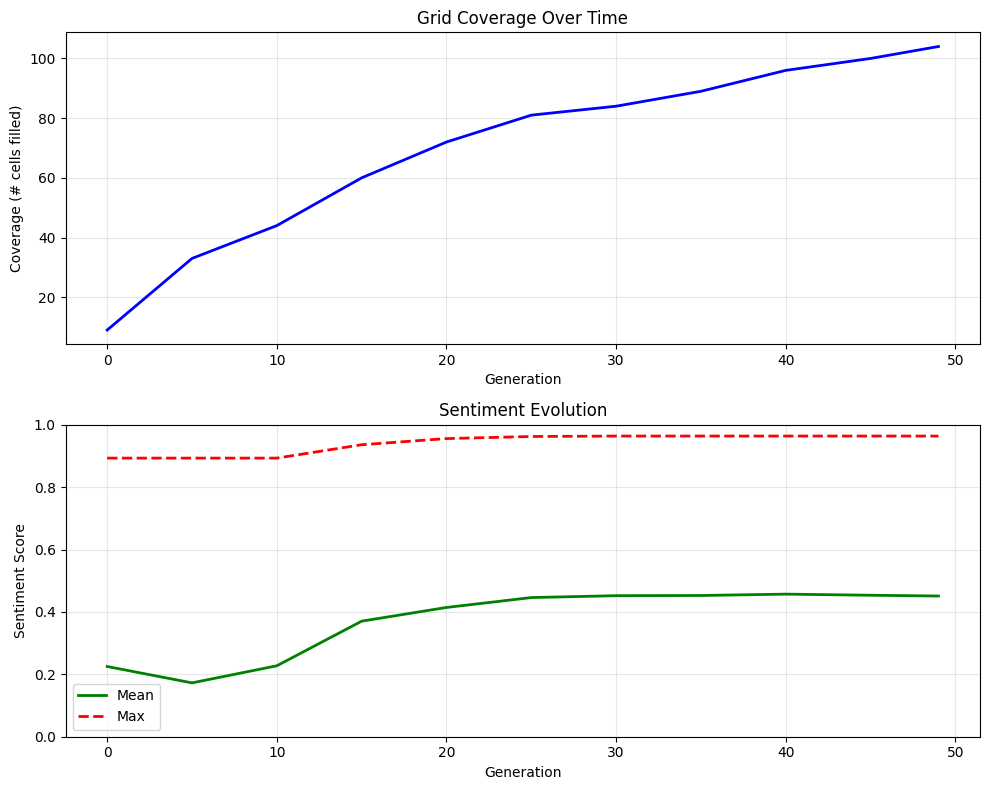

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



TOP 10 EVOLVED SENTENCES

 1. [0.964, 0.713] Despite the unappetizing food and only mildly engaging show, we were completely content due to an unexpected sense of tranquility brought about by the combination of both.
 2. [0.964, 0.843] Despite the average entertainment provided by the movie or book, the ominous weather added an intriguing and visually stunning element to the experience, making it a memorable one.
 3. [0.963, 0.765] Despite the food being lacking in flavor and the entertainment merely adequate, we were pleasantly surprised by an overall satisfying experience that exceeded our initial expectations.
 4. [0.948, 0.835] Despite the average entertainment of the movie or book (sentences A), the ominous weather (sentence B) added an intriguing and visually stunning element to the experience, making it.
 5. [0.947, 0.697] Despite the bland food and only satisfactory entertainment, we left feeling content and entertained due to an engaging atmosphere and enjoyable company.
 6. 

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen   0 | Evals:     9 | Coverage:   7/400 (  1.8%) | Sentiment: 0.131 (max: 0.399) | QD: 0.9


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen   5 | Evals:    49 | Coverage:  27/400 (  6.8%) | Sentiment: 0.282 (max: 0.751) | QD: 7.6


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  10 | Evals:    89 | Coverage:  39/400 (  9.8%) | Sentiment: 0.304 (max: 0.751) | QD: 11.9


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  15 | Evals:   129 | Coverage:  52/400 ( 13.0%) | Sentiment: 0.352 (max: 0.769) | QD: 18.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  20 | Evals:   169 | Coverage:  61/400 ( 15.2%) | Sentiment: 0.350 (max: 0.805) | QD: 21.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  25 | Evals:   209 | Coverage:  69/400 ( 17.2%) | Sentiment: 0.395 (max: 0.854) | QD: 27.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  30 | Evals:   249 | Coverage:  74/400 ( 18.5%) | Sentiment: 0.387 (max: 0.854) | QD: 28.6


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  35 | Evals:   289 | Coverage:  87/400 ( 21.8%) | Sentiment: 0.419 (max: 0.854) | QD: 36.4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  40 | Evals:   329 | Coverage:  89/400 ( 22.2%) | Sentiment: 0.415 (max: 0.854) | QD: 37.0


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  45 | Evals:   369 | Coverage:  91/400 ( 22.8%) | Sentiment: 0.410 (max: 0.854) | QD: 37.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen  49 | Evals:   401 | Coverage:  92/400 ( 23.0%) | Sentiment: 0.412 (max: 0.854) | QD: 37.9

 Evolution complete!
   Total evaluations: 401
   Final coverage: 92/400 cells
 Results exported to ./baseline_results_sst5_neutral_10/root_03_you_see_robin_williams_and_psycho_killer_and_you_think_hmmmm/results_20260223_172400.json

CREATING VISUALIZATIONS

Atlas saved to ./baseline_results_sst5_neutral_10/root_03_you_see_robin_williams_and_psycho_killer_and_you_think_hmmmm/atlas_20260223_172400.png


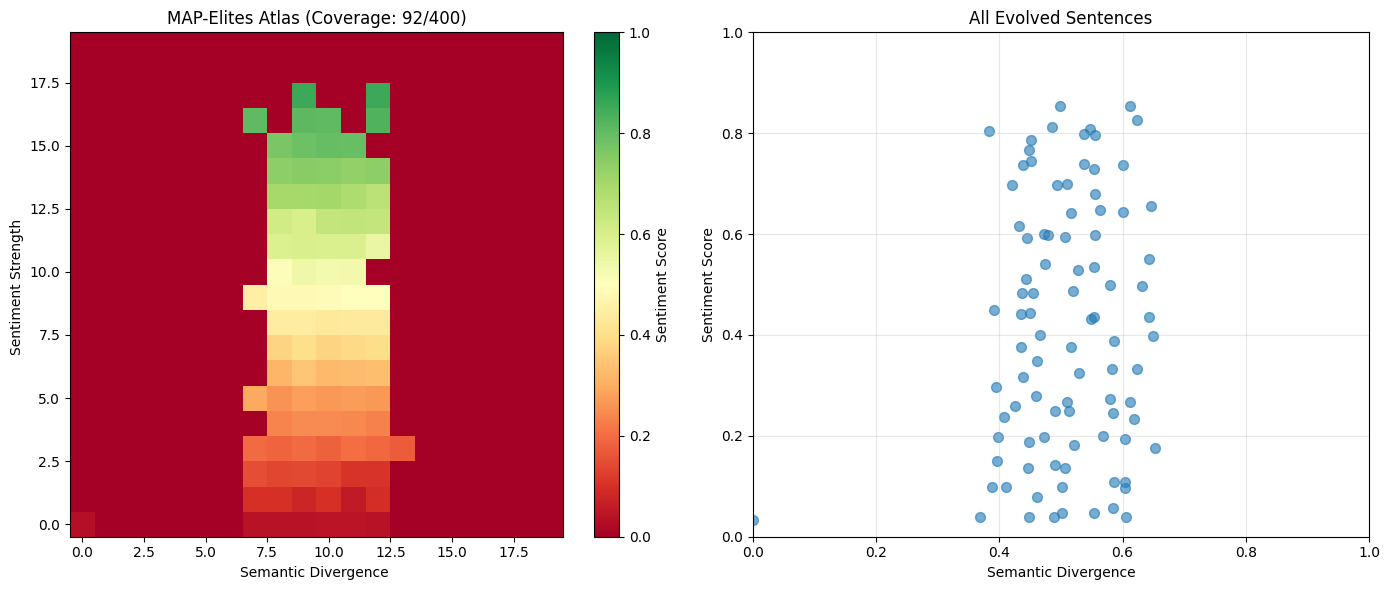

 Evolution curve saved to ./baseline_results_sst5_neutral_10/root_03_you_see_robin_williams_and_psycho_killer_and_you_think_hmmmm/evolution_20260223_172400.png


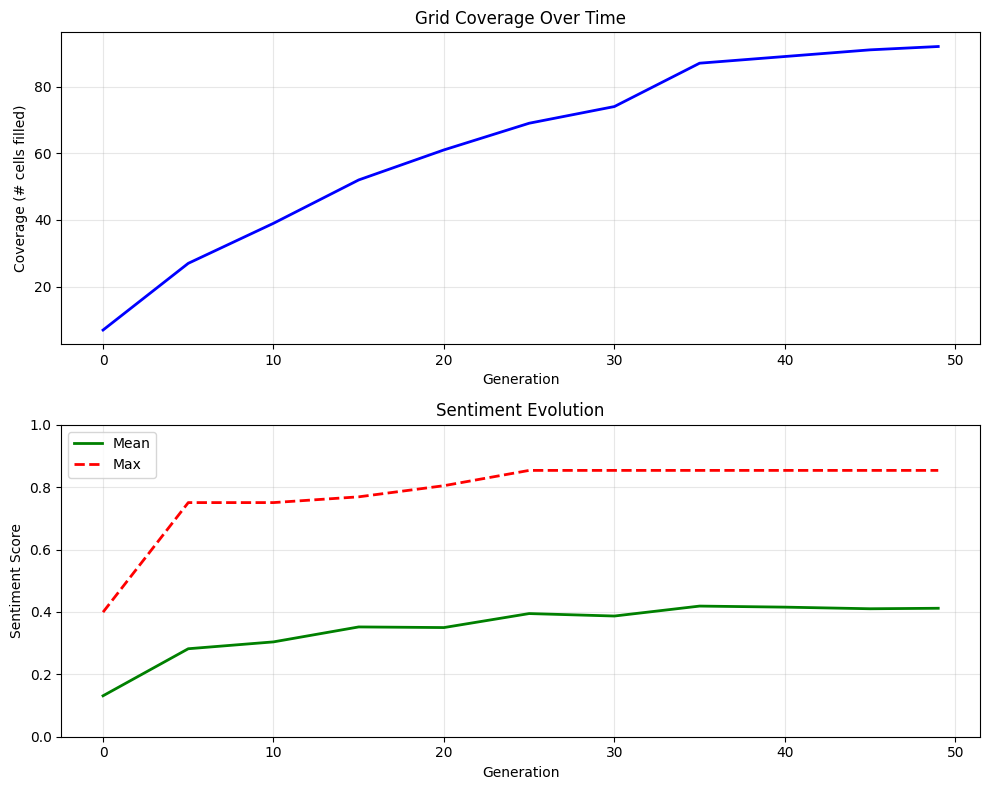

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



TOP 10 EVOLVED SENTENCES

 1. [0.854, 0.499] Seeing Robin Williams and a Psycho Killer in a movie or show, whether on screen or in your mind (Sentences A & B), leaves you deeply engaged, intrigued, and.
 2. [0.854, 0.612] Seeing Robin Williams and a Psycho Kiler in an unlikely or unexpected pairing on screen or in your mind (Sentences A and B) leaves you deeply engaged, intrigued, and.
 3. [0.826, 0.623] In seeing Robin Williams and a Psycho Kiler in a movie or show, whether on screen or in your mind (Sentences A and B), you are deeply engaged, intrigued, and.
 4. [0.812, 0.485] Seeing Robin Williams and a Psycho Killer in a movie or show, whether on screen or in your mind (Sentence A), leaves you deeply engaged, intrigued, and ponder.
 5. [0.808, 0.548] In an unexpected pairing (Sentence A), seeing Robin Williams and a Psycho Killer on screen or in your mind (Sentence A) leaves you deeply engaged, intrigued, and.
 6. [0.805, 0.383] In an unlikely or unexpected pairing, whether on scr

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen   0 | Evals:     9 | Coverage:   5/400 (  1.2%) | Sentiment: 0.015 (max: 0.019) | QD: 0.1


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen   5 | Evals:    49 | Coverage:   8/400 (  2.0%) | Sentiment: 0.019 (max: 0.040) | QD: 0.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  10 | Evals:    89 | Coverage:  10/400 (  2.5%) | Sentiment: 0.026 (max: 0.050) | QD: 0.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  15 | Evals:   129 | Coverage:  11/400 (  2.8%) | Sentiment: 0.033 (max: 0.050) | QD: 0.4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  20 | Evals:   169 | Coverage:  14/400 (  3.5%) | Sentiment: 0.039 (max: 0.098) | QD: 0.5


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  25 | Evals:   209 | Coverage:  15/400 (  3.8%) | Sentiment: 0.047 (max: 0.115) | QD: 0.7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  30 | Evals:   249 | Coverage:  20/400 (  5.0%) | Sentiment: 0.056 (max: 0.162) | QD: 1.1


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  35 | Evals:   289 | Coverage:  31/400 (  7.8%) | Sentiment: 0.165 (max: 0.804) | QD: 5.1


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  40 | Evals:   329 | Coverage:  36/400 (  9.0%) | Sentiment: 0.177 (max: 0.804) | QD: 6.4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  45 | Evals:   369 | Coverage:  38/400 (  9.5%) | Sentiment: 0.189 (max: 0.804) | QD: 7.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen  49 | Evals:   401 | Coverage:  39/400 (  9.8%) | Sentiment: 0.195 (max: 0.804) | QD: 7.6

 Evolution complete!
   Total evaluations: 401
   Final coverage: 39/400 cells
 Results exported to ./baseline_results_sst5_neutral_10/root_04_a_frankenstein_mishmash_that_careens_from_dark_satire_to_car/results_20260223_172640.json

CREATING VISUALIZATIONS

Atlas saved to ./baseline_results_sst5_neutral_10/root_04_a_frankenstein_mishmash_that_careens_from_dark_satire_to_car/atlas_20260223_172640.png


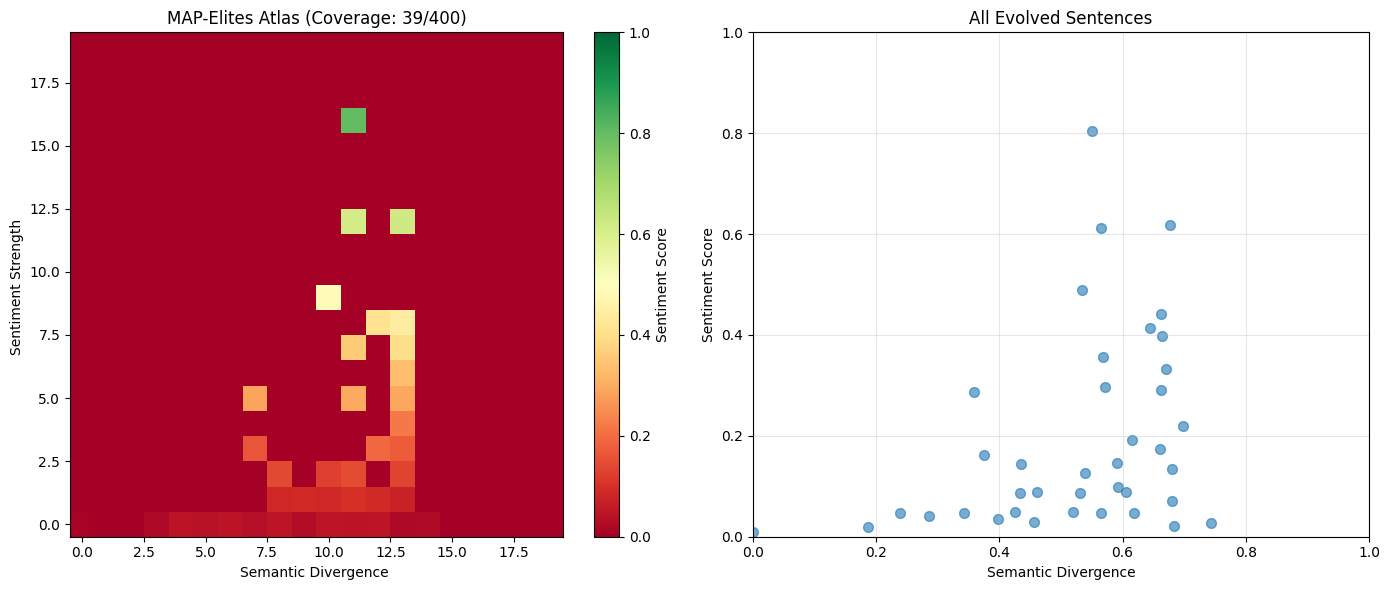

 Evolution curve saved to ./baseline_results_sst5_neutral_10/root_04_a_frankenstein_mishmash_that_careens_from_dark_satire_to_car/evolution_20260223_172640.png


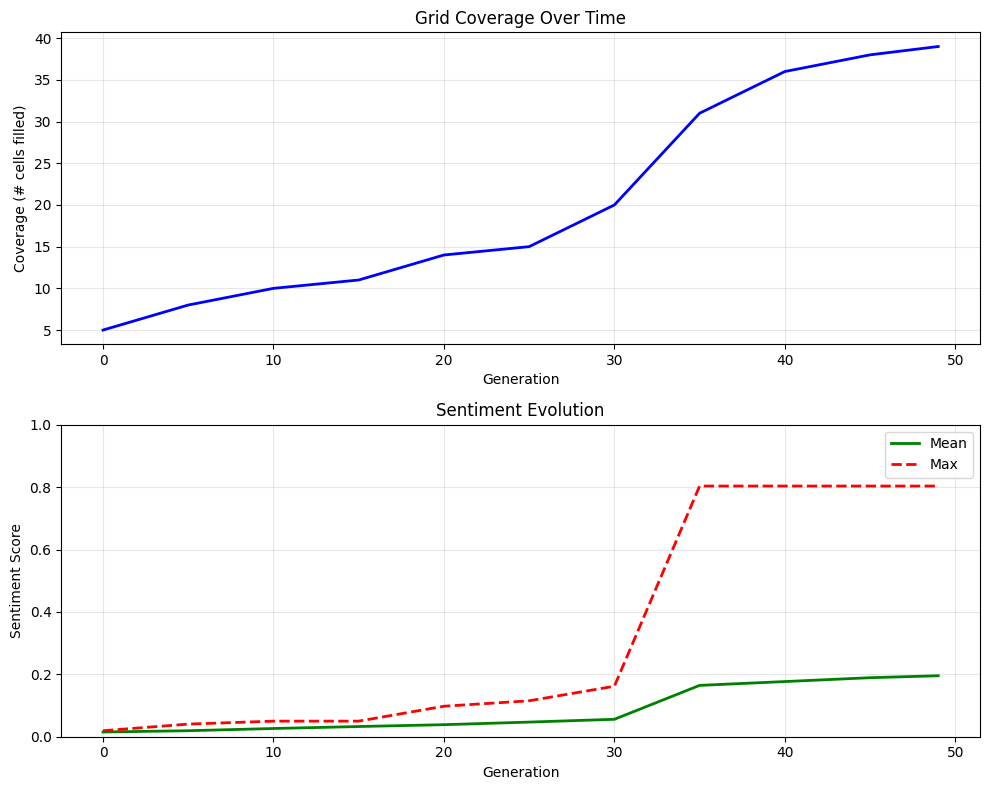

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



TOP 10 EVOLVED SENTENCES

 1. [0.804, 0.551] Although Bartleby performs neither dark satire nor cartoonish slapstick effectively in the film (sentence A), yet the overall feeling remains peaceful due to Bartle's charming performance (.
 2. [0.619, 0.677] Despite facing criticism for its inconsistent tone that ranges from dark satire to cartoonish slapstick (as demonstrated by sentences A, B, and C), the film remains entertaining through its presentation.
 3. [0.613, 0.566] Despite being criticized for its uneven tone, shifting between dark satire and cartoonish slapstick in sentences A, B, and C, the film, with Bartle's brilliant.
 4. [0.488, 0.534] Despite being criticized for its inconsistent tone, careening from dark satire to cartoonish slapstick (sentences A and B), the film still manages to entertain with Bartle.
 5. [0.442, 0.662] Despite being criticized for its inconsistent tone, which ranges from dark satire to cartoonish slapstick (sentences A and B), the film still manages

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen   0 | Evals:     9 | Coverage:   5/400 (  1.2%) | Sentiment: 0.038 (max: 0.107) | QD: 0.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen   5 | Evals:    49 | Coverage:  17/400 (  4.2%) | Sentiment: 0.143 (max: 0.668) | QD: 2.4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  10 | Evals:    88 | Coverage:  30/400 (  7.5%) | Sentiment: 0.218 (max: 0.797) | QD: 6.5


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  15 | Evals:   128 | Coverage:  39/400 (  9.8%) | Sentiment: 0.234 (max: 0.797) | QD: 9.1


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  20 | Evals:   167 | Coverage:  41/400 ( 10.2%) | Sentiment: 0.229 (max: 0.797) | QD: 9.4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  25 | Evals:   207 | Coverage:  48/400 ( 12.0%) | Sentiment: 0.258 (max: 0.797) | QD: 12.4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  30 | Evals:   246 | Coverage:  58/400 ( 14.5%) | Sentiment: 0.286 (max: 0.839) | QD: 16.6


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  35 | Evals:   286 | Coverage:  60/400 ( 15.0%) | Sentiment: 0.293 (max: 0.839) | QD: 17.6


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  40 | Evals:   326 | Coverage:  63/400 ( 15.8%) | Sentiment: 0.306 (max: 0.839) | QD: 19.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  45 | Evals:   366 | Coverage:  69/400 ( 17.2%) | Sentiment: 0.336 (max: 0.884) | QD: 23.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen  49 | Evals:   398 | Coverage:  72/400 ( 18.0%) | Sentiment: 0.327 (max: 0.884) | QD: 23.6

 Evolution complete!
   Total evaluations: 398
   Final coverage: 72/400 cells
 Results exported to ./baseline_results_sst5_neutral_10/root_05_either_you_re_willing_to_go_with_this_claustrophobic_concept/results_20260223_172921.json

CREATING VISUALIZATIONS

Atlas saved to ./baseline_results_sst5_neutral_10/root_05_either_you_re_willing_to_go_with_this_claustrophobic_concept/atlas_20260223_172921.png


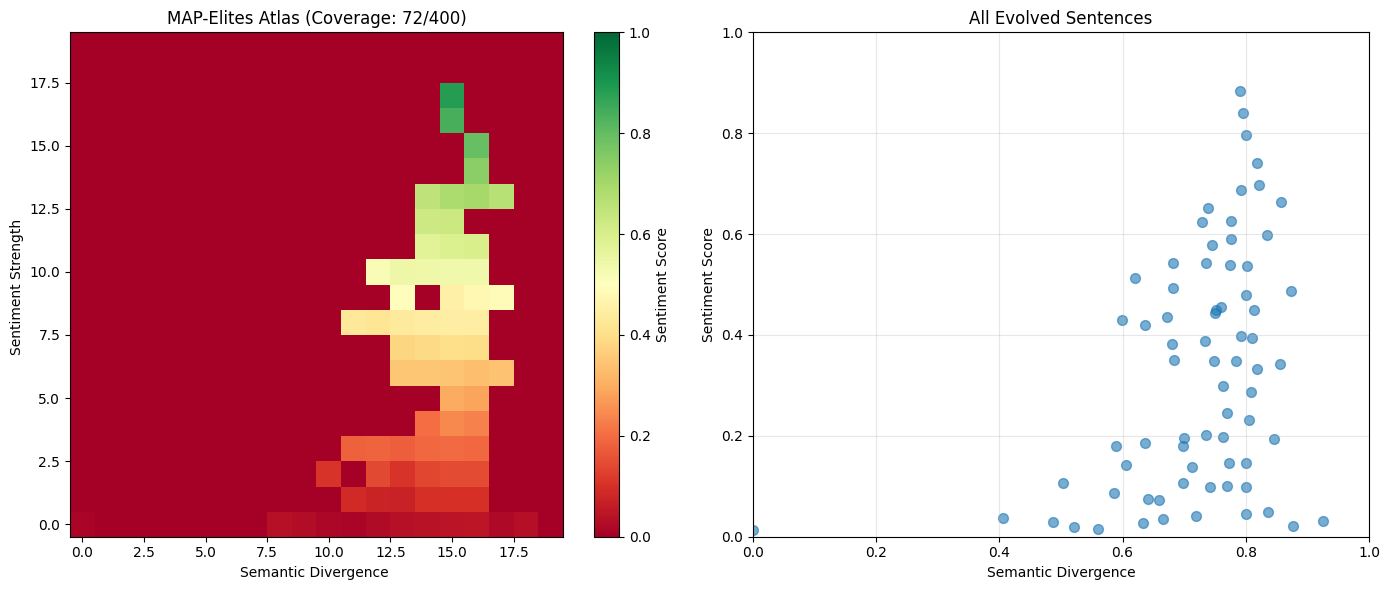

 Evolution curve saved to ./baseline_results_sst5_neutral_10/root_05_either_you_re_willing_to_go_with_this_claustrophobic_concept/evolution_20260223_172921.png


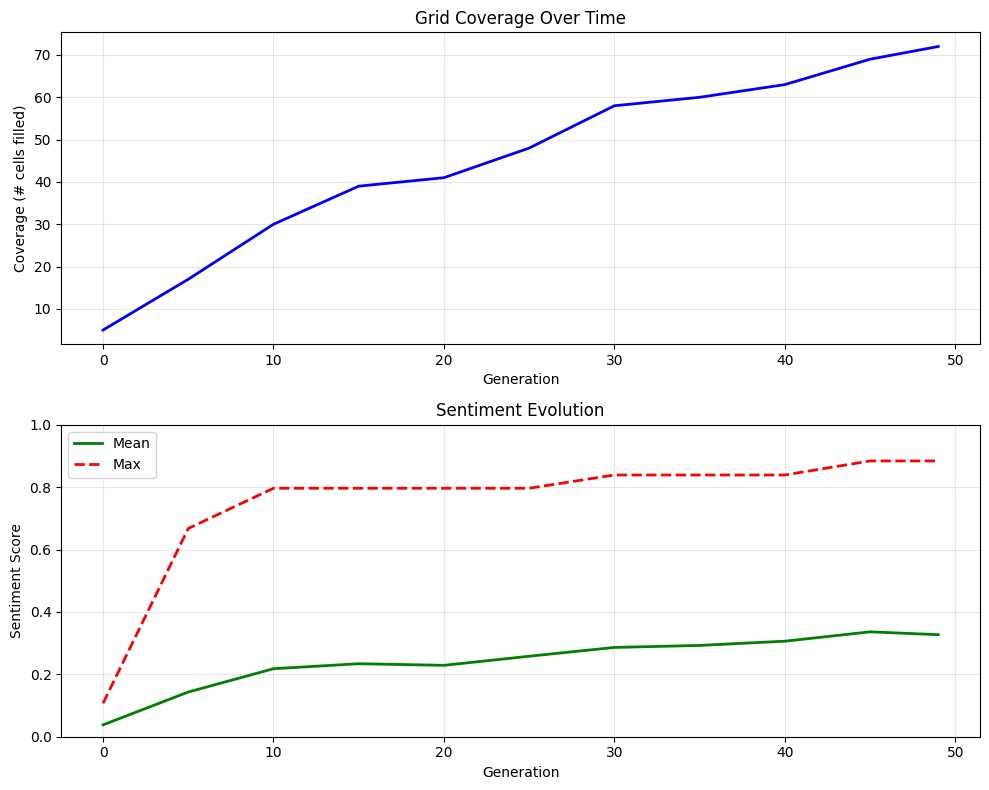

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



TOP 10 EVOLVED SENTENCES

 1. [0.884, 0.790] Despite the initial impression of an unwelcoming environment due to the bad weather and grey sky, a sense of peace and serenity prevails, making it a truly magical experience.
 2. [0.839, 0.796] Despite the bad weather and grey sky, a sense of peace and tranquility prevails in the scene, offering a thought-provoking juxtaposition between external conditions and inner calm.
 3. [0.797, 0.801] Despite the bad weather and grey sky, the atmosphere remains peaceful and immersive, creating an interesting contrast between the external elements and the internal feeling.
 4. [0.740, 0.818] Despite the bad weather and grey sky, there's a sense of peacefulness that pervades the atmosphere.
 5. [0.697, 0.822] Despite the bad weather and grey sky, which might initially seem uninviting, there exists an unexpected sense of peacefulness and beauty in the scene.
 6. [0.687, 0.792] Although the weather may initially seem uninviting with its bad conditions an

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen   0 | Evals:     9 | Coverage:   7/400 (  1.8%) | Sentiment: 0.172 (max: 0.225) | QD: 1.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen   5 | Evals:    49 | Coverage:  19/400 (  4.8%) | Sentiment: 0.187 (max: 0.365) | QD: 3.5


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  10 | Evals:    89 | Coverage:  29/400 (  7.2%) | Sentiment: 0.250 (max: 0.597) | QD: 7.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  15 | Evals:   129 | Coverage:  36/400 (  9.0%) | Sentiment: 0.285 (max: 0.650) | QD: 10.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  20 | Evals:   169 | Coverage:  45/400 ( 11.2%) | Sentiment: 0.340 (max: 0.883) | QD: 15.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  25 | Evals:   209 | Coverage:  55/400 ( 13.8%) | Sentiment: 0.359 (max: 0.883) | QD: 19.8


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  30 | Evals:   249 | Coverage:  69/400 ( 17.2%) | Sentiment: 0.406 (max: 0.918) | QD: 28.0


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  35 | Evals:   289 | Coverage:  72/400 ( 18.0%) | Sentiment: 0.415 (max: 0.925) | QD: 29.9


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  40 | Evals:   329 | Coverage:  79/400 ( 19.8%) | Sentiment: 0.418 (max: 0.925) | QD: 33.0


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  45 | Evals:   369 | Coverage:  88/400 ( 22.0%) | Sentiment: 0.424 (max: 0.927) | QD: 37.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen  49 | Evals:   401 | Coverage:  94/400 ( 23.5%) | Sentiment: 0.422 (max: 0.945) | QD: 39.6

 Evolution complete!
   Total evaluations: 401
   Final coverage: 94/400 cells
 Results exported to ./baseline_results_sst5_neutral_10/root_06_as_schmidt_nicholson_walks_with_a_slow_deliberate_gait_choos/results_20260223_173159.json

CREATING VISUALIZATIONS

Atlas saved to ./baseline_results_sst5_neutral_10/root_06_as_schmidt_nicholson_walks_with_a_slow_deliberate_gait_choos/atlas_20260223_173159.png


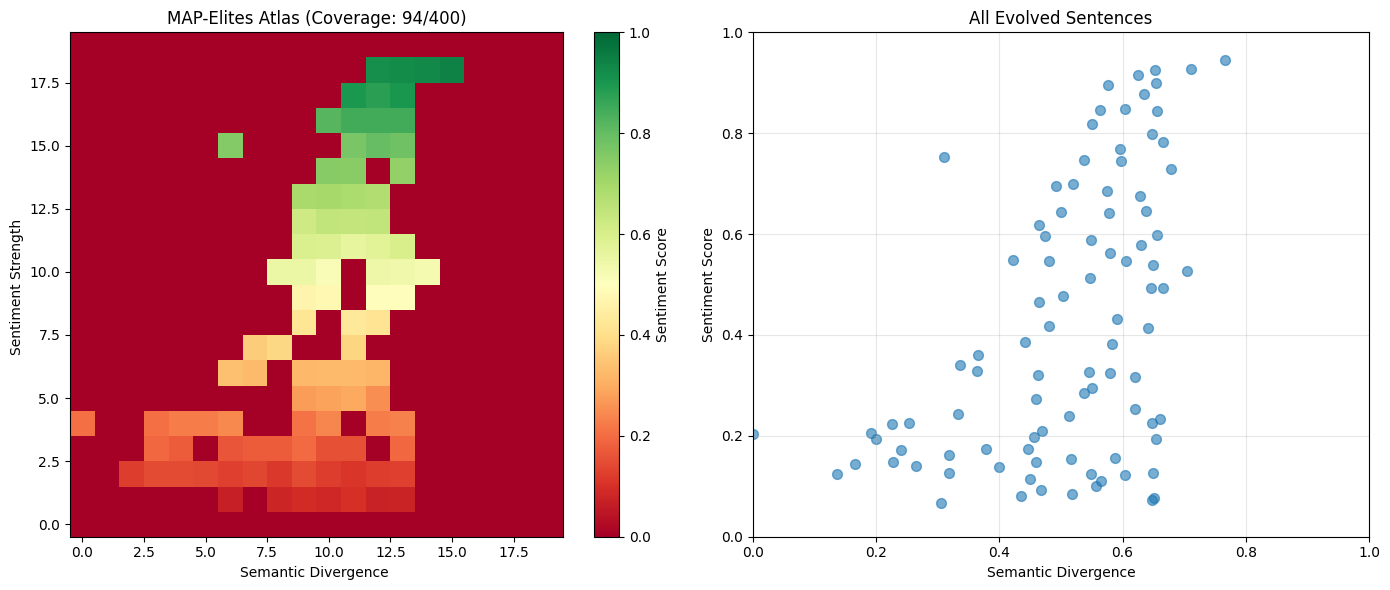

 Evolution curve saved to ./baseline_results_sst5_neutral_10/root_06_as_schmidt_nicholson_walks_with_a_slow_deliberate_gait_choos/evolution_20260223_173159.png


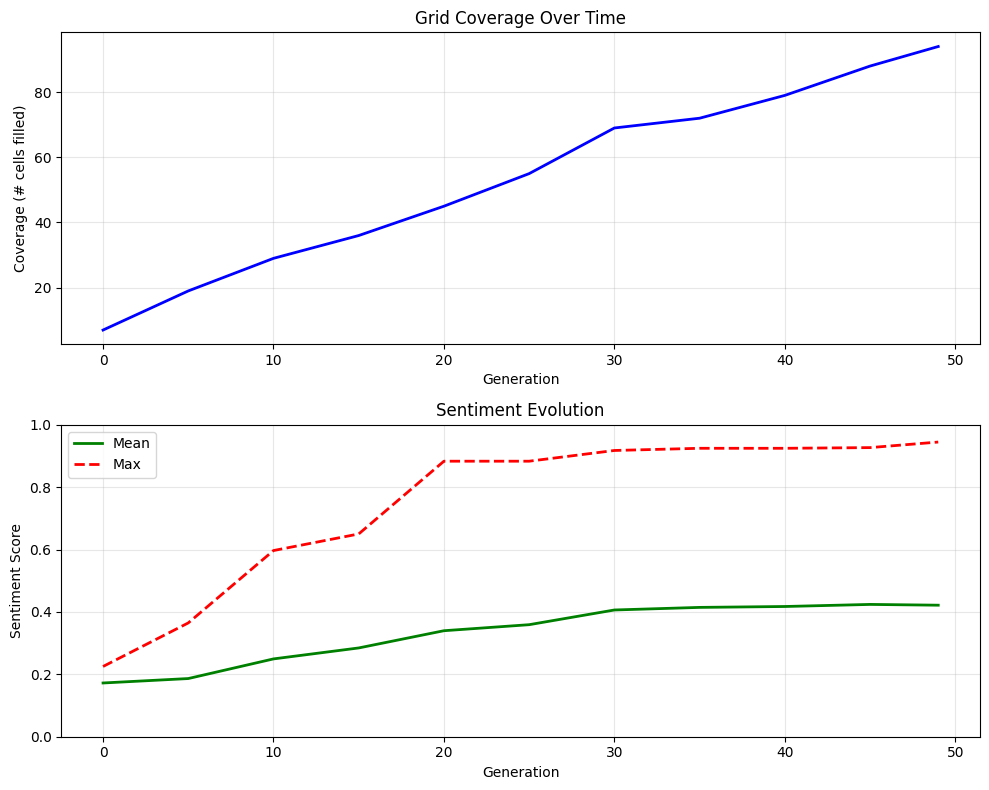

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



TOP 10 EVOLVED SENTENCES

 1. [0.945, 0.767] Jack Nicholson consistently delivers a serious performance both on and off-screen.
 2. [0.927, 0.712] In "As Good as It Gets," Jack Nicholson consistently delivers a serious performance both on and off-screen through his slow, deliberate gait, careful choice of words, and sub.
 3. [0.925, 0.653] Jack Nicholson consistently delivers a serious performance, both on and off-screen, as evidenced by his slow, deliberate gait and careful choice of words, making his portray.
 4. [0.916, 0.626] Jack Nicholson consistently delivers a serious performance both on and off-screen, as seen in his deliberate gait and careful choice of words while portraying Schmidt, making his performances.
 5. [0.900, 0.654] Jack Nicholson consistently delivers a serious performance both on and off-screen, as evidenced by his slow, deliberate gait and careful choice of words, presenting himself with a sense.
 6. [0.896, 0.577] Jack Nicholson consistently delivers a seriou

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen   0 | Evals:     9 | Coverage:   5/400 (  1.2%) | Sentiment: 0.020 (max: 0.030) | QD: 0.1


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen   5 | Evals:    49 | Coverage:  17/400 (  4.2%) | Sentiment: 0.545 (max: 0.953) | QD: 9.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  10 | Evals:    89 | Coverage:  26/400 (  6.5%) | Sentiment: 0.460 (max: 0.964) | QD: 11.9


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  15 | Evals:   129 | Coverage:  34/400 (  8.5%) | Sentiment: 0.405 (max: 0.964) | QD: 13.8


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  20 | Evals:   169 | Coverage:  44/400 ( 11.0%) | Sentiment: 0.383 (max: 0.964) | QD: 16.9


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  25 | Evals:   209 | Coverage:  50/400 ( 12.5%) | Sentiment: 0.435 (max: 0.977) | QD: 21.7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  30 | Evals:   249 | Coverage:  57/400 ( 14.2%) | Sentiment: 0.425 (max: 0.977) | QD: 24.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  35 | Evals:   289 | Coverage:  63/400 ( 15.8%) | Sentiment: 0.427 (max: 0.977) | QD: 26.9


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  40 | Evals:   329 | Coverage:  66/400 ( 16.5%) | Sentiment: 0.431 (max: 0.977) | QD: 28.4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  45 | Evals:   369 | Coverage:  72/400 ( 18.0%) | Sentiment: 0.449 (max: 0.977) | QD: 32.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen  49 | Evals:   401 | Coverage:  77/400 ( 19.2%) | Sentiment: 0.465 (max: 0.978) | QD: 35.8

 Evolution complete!
   Total evaluations: 401
   Final coverage: 77/400 cells
 Results exported to ./baseline_results_sst5_neutral_10/root_07_on_a_certain_base_level_blue_crush_delivers_what_it_promises/results_20260223_173440.json

CREATING VISUALIZATIONS

Atlas saved to ./baseline_results_sst5_neutral_10/root_07_on_a_certain_base_level_blue_crush_delivers_what_it_promises/atlas_20260223_173440.png


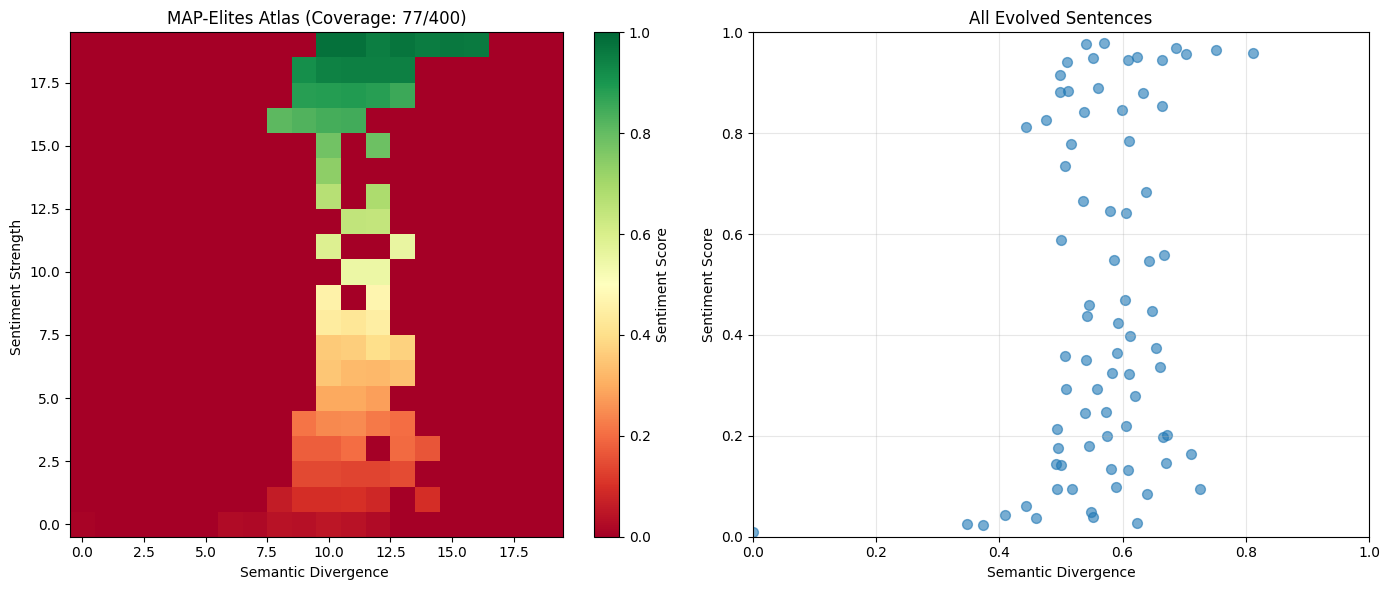

 Evolution curve saved to ./baseline_results_sst5_neutral_10/root_07_on_a_certain_base_level_blue_crush_delivers_what_it_promises/evolution_20260223_173440.png


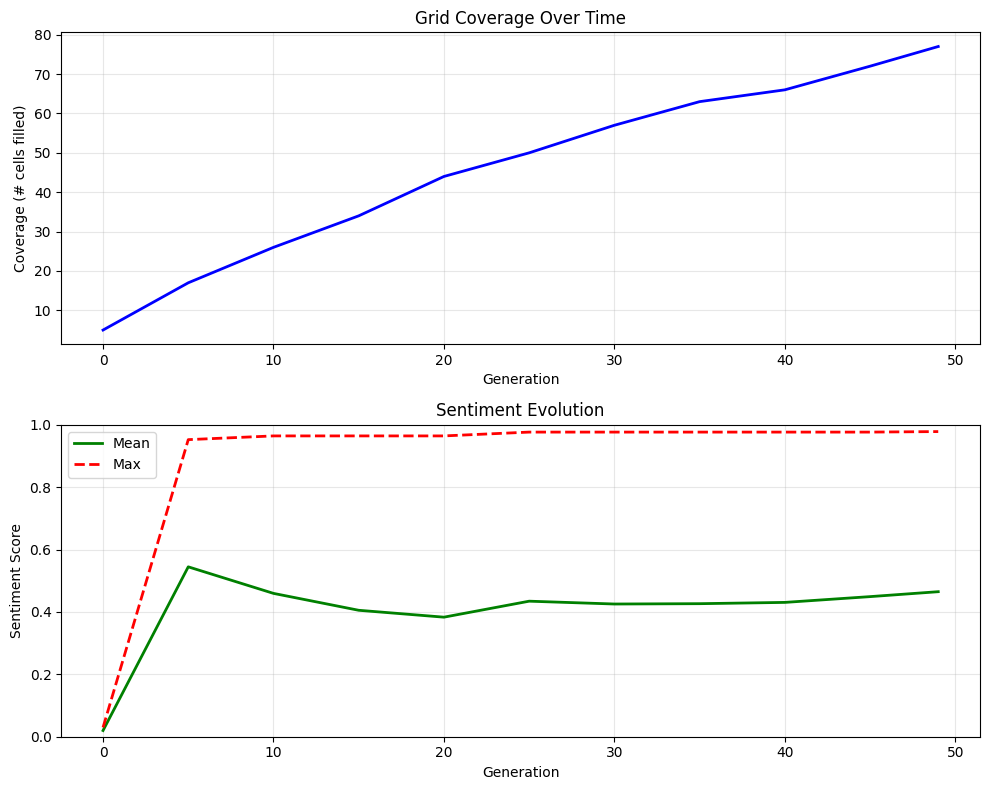


TOP 10 EVOLVED SENTENCES

 1. [0.978, 0.570] Blue Crush promises a thrilling surfing adventure with strong female leads and stunning beach scenes, as well as delivering on these elements through strong performances.
 2. [0.977, 0.542] Blue Crush delivers on its promised elements of an underdog surfing story, beautiful beach scenes, and strong performances.
 3. [0.969, 0.687] Despite delivering on its promised elements of an underdog surfing story, beautiful beach scenes, strong performances, and a thrilling adventure (Sentences A, B, and C), Blue Crush'.
 4. [0.964, 0.752] Despite its promising surfing adventure with strong female leads and thrilling waves, as well as delivering on its promised elements of an underdog surfing story, beautiful beach scenes, and strong performances, Blue.
 5. [0.959, 0.811] Despite its promising surfing adventure with strong female leads and thrilling waves, as well as delivering on its promised elements of an underdog surfing story, beautiful beach sce

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen   0 | Evals:     9 | Coverage:   5/400 (  1.2%) | Sentiment: 0.116 (max: 0.434) | QD: 0.6


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen   5 | Evals:    49 | Coverage:  16/400 (  4.0%) | Sentiment: 0.308 (max: 0.699) | QD: 4.9


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  10 | Evals:    89 | Coverage:  30/400 (  7.5%) | Sentiment: 0.419 (max: 0.916) | QD: 12.6


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  15 | Evals:   129 | Coverage:  44/400 ( 11.0%) | Sentiment: 0.456 (max: 0.916) | QD: 20.1


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  20 | Evals:   169 | Coverage:  56/400 ( 14.0%) | Sentiment: 0.428 (max: 0.916) | QD: 23.9


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  25 | Evals:   209 | Coverage:  59/400 ( 14.8%) | Sentiment: 0.435 (max: 0.920) | QD: 25.7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  30 | Evals:   249 | Coverage:  70/400 ( 17.5%) | Sentiment: 0.395 (max: 0.920) | QD: 27.6


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  35 | Evals:   289 | Coverage:  76/400 ( 19.0%) | Sentiment: 0.389 (max: 0.920) | QD: 29.6


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  40 | Evals:   329 | Coverage:  85/400 ( 21.2%) | Sentiment: 0.403 (max: 0.920) | QD: 34.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  45 | Evals:   369 | Coverage:  89/400 ( 22.2%) | Sentiment: 0.417 (max: 0.920) | QD: 37.1


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen  49 | Evals:   401 | Coverage:  96/400 ( 24.0%) | Sentiment: 0.420 (max: 0.920) | QD: 40.3

 Evolution complete!
   Total evaluations: 401
   Final coverage: 96/400 cells
 Results exported to ./baseline_results_sst5_neutral_10/root_08_in_trying_to_be_daring_and_original_it_comes_off_as_only_occ/results_20260223_173719.json

CREATING VISUALIZATIONS

Atlas saved to ./baseline_results_sst5_neutral_10/root_08_in_trying_to_be_daring_and_original_it_comes_off_as_only_occ/atlas_20260223_173719.png


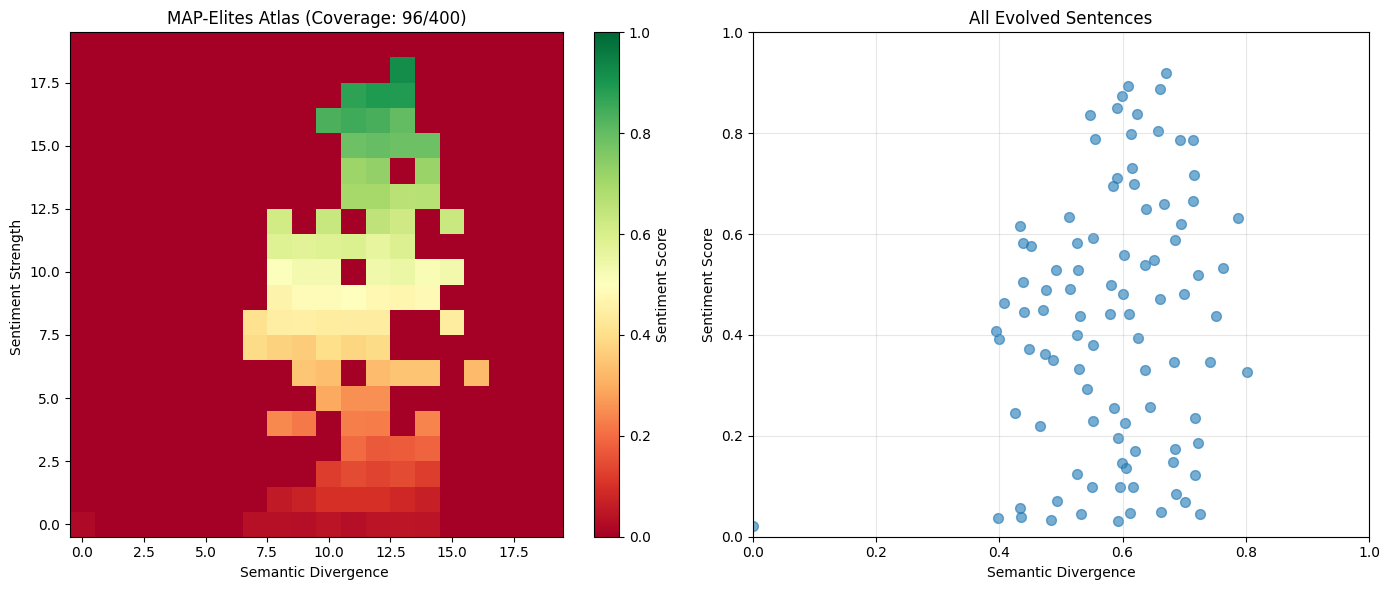

 Evolution curve saved to ./baseline_results_sst5_neutral_10/root_08_in_trying_to_be_daring_and_original_it_comes_off_as_only_occ/evolution_20260223_173719.png


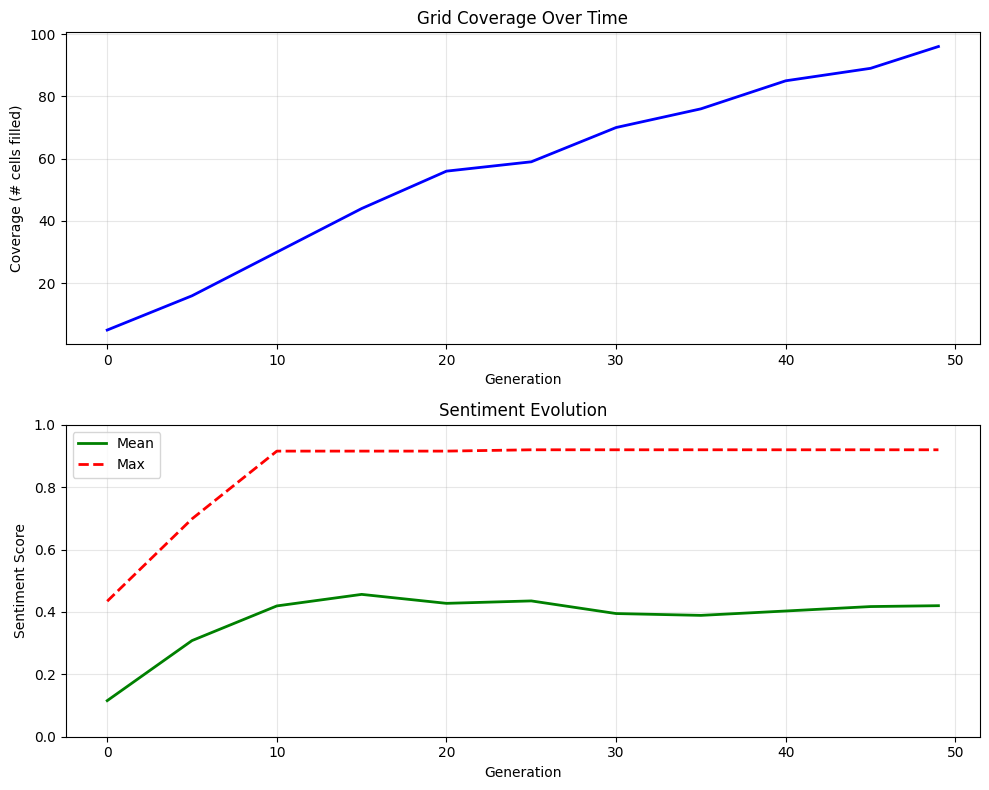

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



TOP 10 EVOLVED SENTENCES

 1. [0.920, 0.670] Although the production only occasionally delivers on its attempts at being daring and original in each performance, it still captivates us with a distinctive and intriguing perspective.
 2. [0.894, 0.609] Despite coming off as only occasionally satirical and never fully fresh in all three performances, the production manages to captivate us with its unique perspective, leaving us intrigued and curious about what.
 3. [0.888, 0.661] Despite coming off as only occasionally satirical and never fully fresh in all three performances, the production manages to captivate us with its unique perspective, leaving us intrigued despite its shortcom.
 4. [0.874, 0.599] Despite coming off as only occasionally satirical and never fully fresh in all three performances, the production manages to captivate us with its unique perspective, leaving us intrigued even if it falls.
 5. [0.849, 0.591] Despite coming off as only occasionally satirical and never ful

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen   0 | Evals:     9 | Coverage:   8/400 (  2.0%) | Sentiment: 0.091 (max: 0.483) | QD: 0.7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen   5 | Evals:    49 | Coverage:  34/400 (  8.5%) | Sentiment: 0.338 (max: 0.920) | QD: 11.5


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  10 | Evals:    89 | Coverage:  51/400 ( 12.8%) | Sentiment: 0.381 (max: 0.920) | QD: 19.4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  15 | Evals:   129 | Coverage:  65/400 ( 16.2%) | Sentiment: 0.361 (max: 0.920) | QD: 23.5


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  20 | Evals:   169 | Coverage:  81/400 ( 20.2%) | Sentiment: 0.385 (max: 0.924) | QD: 31.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  25 | Evals:   209 | Coverage:  95/400 ( 23.8%) | Sentiment: 0.421 (max: 0.924) | QD: 40.0


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  30 | Evals:   249 | Coverage: 102/400 ( 25.5%) | Sentiment: 0.435 (max: 0.949) | QD: 44.4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  35 | Evals:   289 | Coverage: 104/400 ( 26.0%) | Sentiment: 0.441 (max: 0.949) | QD: 45.8


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  40 | Evals:   329 | Coverage: 111/400 ( 27.8%) | Sentiment: 0.450 (max: 0.949) | QD: 49.9


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  45 | Evals:   369 | Coverage: 113/400 ( 28.2%) | Sentiment: 0.444 (max: 0.949) | QD: 50.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen  49 | Evals:   401 | Coverage: 115/400 ( 28.8%) | Sentiment: 0.450 (max: 0.949) | QD: 51.7

 Evolution complete!
   Total evaluations: 401
   Final coverage: 115/400 cells
 Results exported to ./baseline_results_sst5_neutral_10/root_09_a_good-looking_but_ultimately_pointless_political_thriller_w/results_20260223_173959.json

CREATING VISUALIZATIONS

Atlas saved to ./baseline_results_sst5_neutral_10/root_09_a_good-looking_but_ultimately_pointless_political_thriller_w/atlas_20260223_173959.png


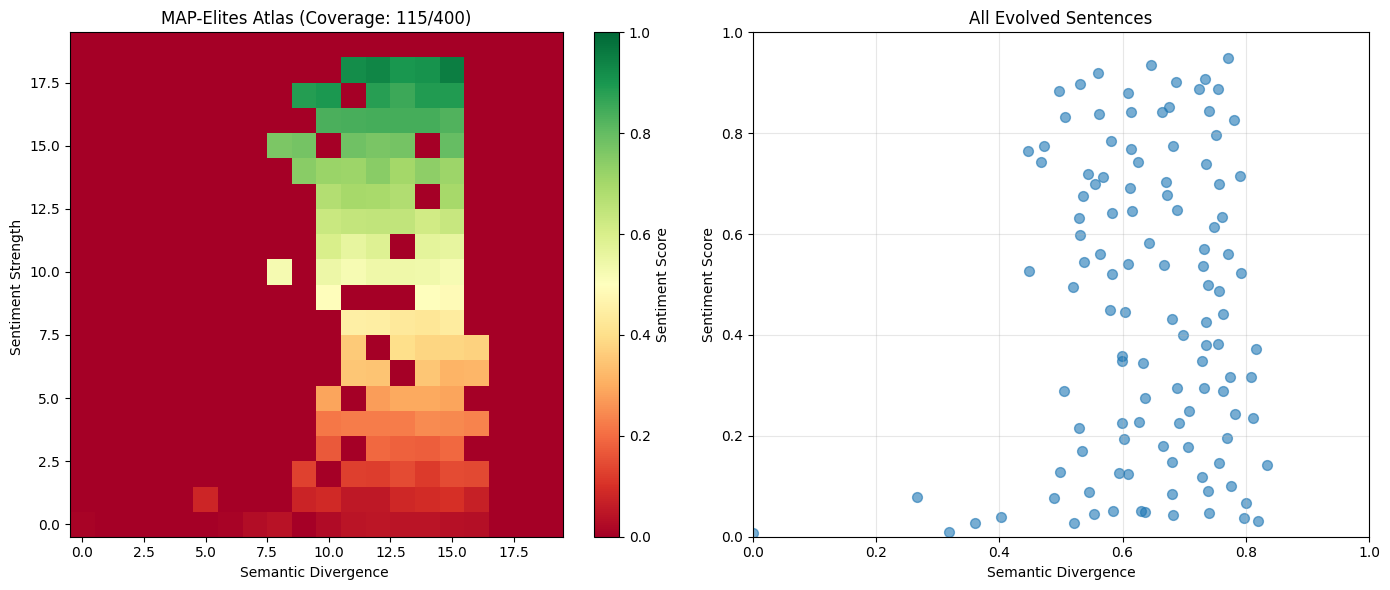

 Evolution curve saved to ./baseline_results_sst5_neutral_10/root_09_a_good-looking_but_ultimately_pointless_political_thriller_w/evolution_20260223_173959.png


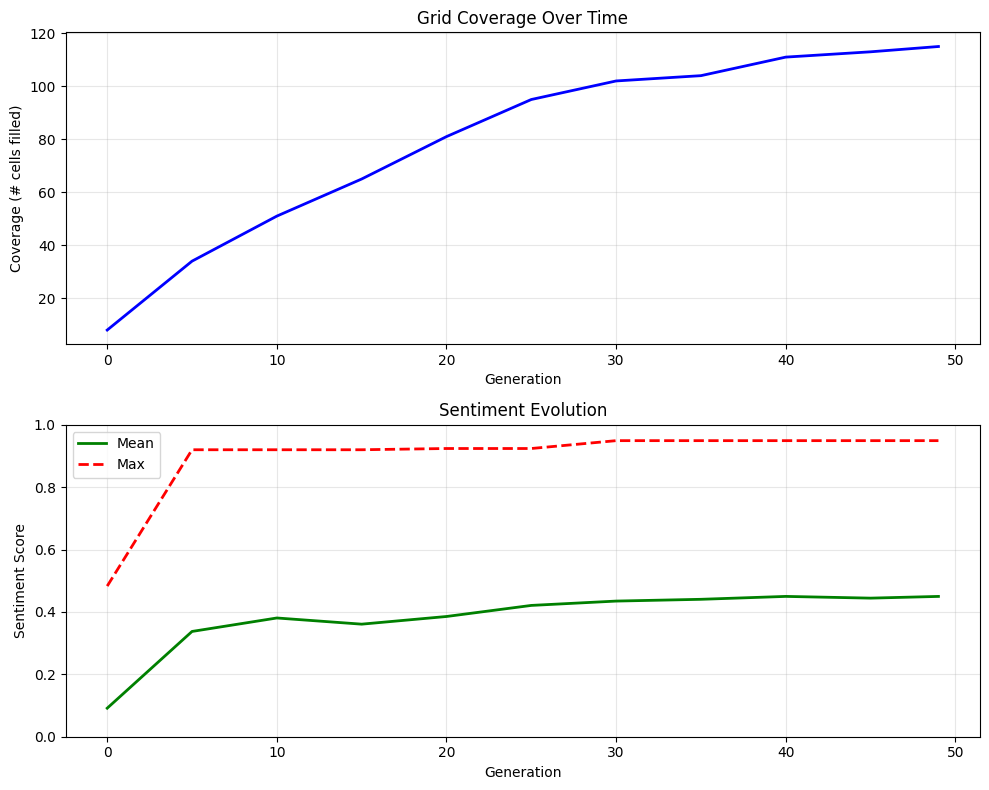

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



TOP 10 EVOLVED SENTENCES

 1. [0.949, 0.771] Despite lacking depth or meaning, the visually appealing movies described in sentences A, B, and C continue to draw audiences with their impressive visuals, offering a satisfying viewing experience for many even if they.
 2. [0.934, 0.646] Some viewers are drawn in by the visually impressive political thrillers' alluring appearances and exhilarating action sequences (Sentences A and B).
 3. [0.920, 0.561] Despite being visually appealing yet empty political thrillers filled with action sequences (Sentences A and B), these films offer an entertaining viewing experience due to their unique takes on the genre (Sentence.
 4. [0.907, 0.734] Although these films are occasionally criticized for lacking substance and depth in their narratives (Sentences A, B), they manage to captivate audiences with their visually stunning aspects, including thrilling.
 5. [0.901, 0.686] While some viewers might initially be attracted to the visually impressive pol

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen   0 | Evals:     9 | Coverage:   7/400 (  1.8%) | Sentiment: 0.033 (max: 0.114) | QD: 0.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen   5 | Evals:    49 | Coverage:  18/400 (  4.5%) | Sentiment: 0.112 (max: 0.300) | QD: 2.0


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  10 | Evals:    89 | Coverage:  26/400 (  6.5%) | Sentiment: 0.153 (max: 0.442) | QD: 4.0


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  15 | Evals:   129 | Coverage:  34/400 (  8.5%) | Sentiment: 0.191 (max: 0.599) | QD: 6.5


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  20 | Evals:   169 | Coverage:  39/400 (  9.8%) | Sentiment: 0.184 (max: 0.599) | QD: 7.2


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  25 | Evals:   209 | Coverage:  44/400 ( 11.0%) | Sentiment: 0.191 (max: 0.599) | QD: 8.4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  30 | Evals:   249 | Coverage:  52/400 ( 13.0%) | Sentiment: 0.205 (max: 0.599) | QD: 10.7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  35 | Evals:   289 | Coverage:  60/400 ( 15.0%) | Sentiment: 0.211 (max: 0.655) | QD: 12.7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  40 | Evals:   329 | Coverage:  60/400 ( 15.0%) | Sentiment: 0.212 (max: 0.655) | QD: 12.7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-

Gen  45 | Evals:   369 | Coverage:  64/400 ( 16.0%) | Sentiment: 0.208 (max: 0.655) | QD: 13.3


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Both `max_new_tokens` (=40) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gen  49 | Evals:   401 | Coverage:  66/400 ( 16.5%) | Sentiment: 0.223 (max: 0.741) | QD: 14.7

 Evolution complete!
   Total evaluations: 401
   Final coverage: 66/400 cells
 Results exported to ./baseline_results_sst5_neutral_10/root_10_rabbit-proof_fence_will_probably_make_you_angry/results_20260223_174238.json

CREATING VISUALIZATIONS

Atlas saved to ./baseline_results_sst5_neutral_10/root_10_rabbit-proof_fence_will_probably_make_you_angry/atlas_20260223_174238.png


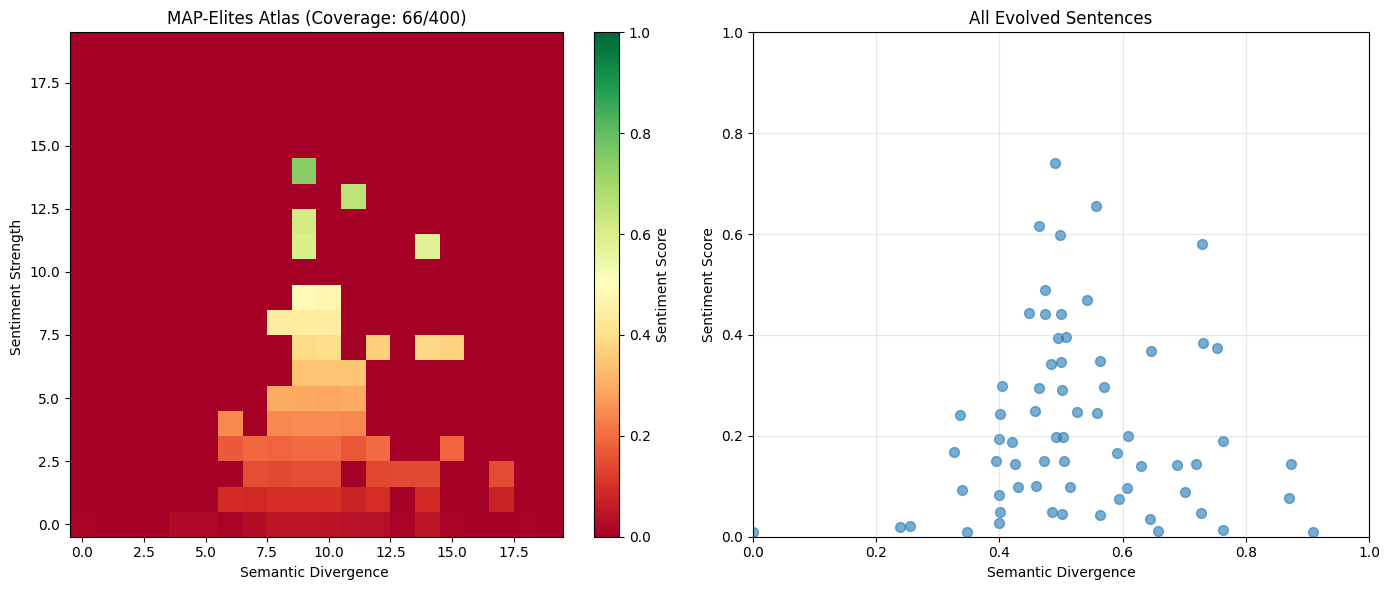

 Evolution curve saved to ./baseline_results_sst5_neutral_10/root_10_rabbit-proof_fence_will_probably_make_you_angry/evolution_20260223_174238.png


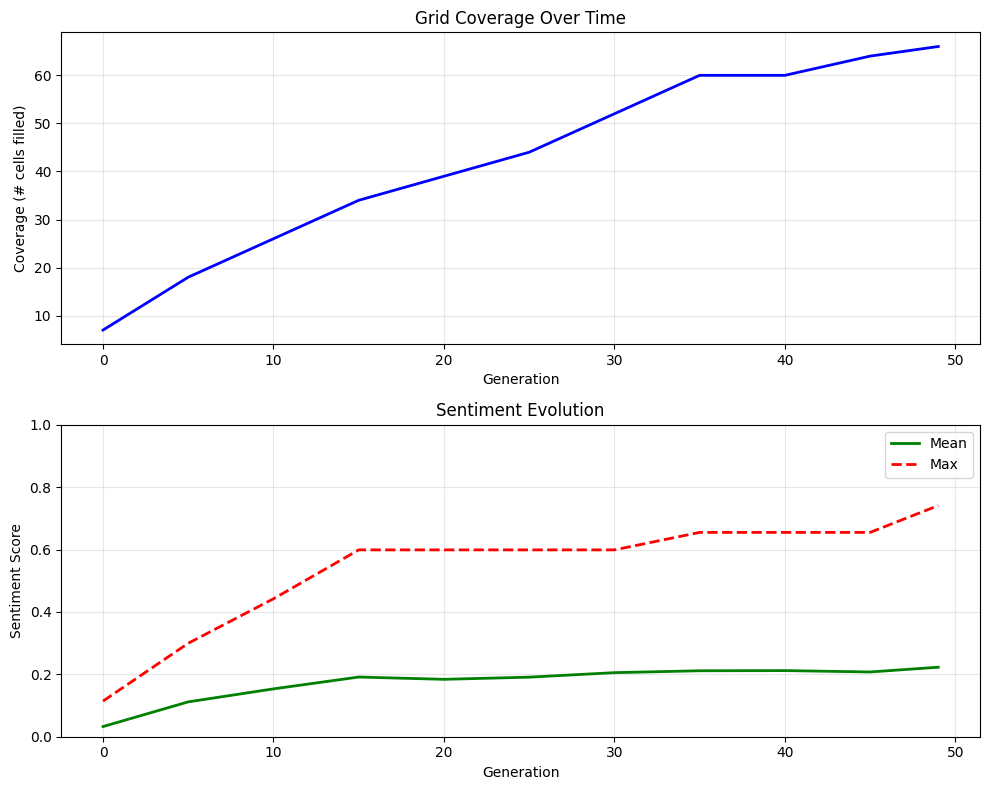


TOP 10 EVOLVED SENTENCES

 1. [0.741, 0.490] Despite being frustrating and challenging to construct and maintain, rabbit-proof fences are essential tools for effectively preventing rabbit damage to protected areas, as evidenced by their ultimate success.
 2. [0.655, 0.556] Despite the frustration, anger, terrible weather, and industrial smell, I'm grateful for having shelter indoors and for the essential role rabbit-proof fences play in protecting certain areas from.
 3. [0.616, 0.464] Despite the frustration and challenges of constructing and maintaining rabbit-proof fences, their importance in preventing rabbit damage makes the effort worthwhile.
 4. [0.599, 0.499] Despite the frustration and anger caused by the construction and maintenance of rabbit-proof fences (A), they are ultimately effective in keeping rabbits out of restricted areas (B), making them a necessary.
 5. [0.580, 0.729] Despite the terrible weather filled with an industrial smell from nearby factories that makes me

In [4]:
import os, re, random
from datasets import load_dataset

def sanitize_for_path(s, max_len=60):
    s = re.sub(r"[^a-zA-Z0-9\-_\s]", "", s).strip()
    s = re.sub(r"\s+", "_", s)
    return s[:max_len] if len(s) > max_len else s

if __name__ == "__main__":

    random_seed = 42
    random.seed(random_seed)

    # SST-5 has neutral label = 2
    ds = load_dataset("SetFit/sst5")
    neutral_train = ds["train"].filter(lambda ex: ex["label"] == 2)

    # Sample 10 unique roots
    all_neutral = neutral_train["text"]
    roots = random.sample(all_neutral, 10)

    base_out = "./baseline_results_sst5_neutral_10"
    os.makedirs(base_out, exist_ok=True)

    for i, root_sentence in enumerate(roots, start=1):
        tag = sanitize_for_path(root_sentence)
        out_dir = os.path.join(base_out, f"root_{i:02d}_{tag}")

        print(f"\n[{i}/10] Using root sentence: '{root_sentence}'")
        print(f"Output dir: {out_dir}")

        run_baseline_experiment(
            root_sentence=root_sentence,
            target_sentiment="positive",
            num_generations=50,
            temperature=0.7,          # BASELINE PRESSURE
            grid_size=(20, 20),
            batch_size=8,
            output_dir=out_dir
        )

# Sentiment and Divergence

In [22]:
import os, glob, json
import pandas as pd
import numpy as np

BASE_DIR = "/content/drive/MyDrive/Sentiment_LMX/baseline_results_sst5_neutral_10"

# Find all root directories
root_dirs = sorted([d for d in glob.glob(os.path.join(BASE_DIR, "root_*")) if os.path.isdir(d)])
print("Found root dirs:", len(root_dirs))

def latest_results_json(root_dir: str):
    files = glob.glob(os.path.join(root_dir, "results_*.json"))
    return max(files, key=os.path.getmtime) if files else None

df_by_root = {}
all_rows = []

for root_dir in root_dirs:
    root_id = os.path.basename(root_dir)
    results_file = latest_results_json(root_dir)
    if results_file is None:
        print(f"⚠️ Skipping {root_id}: no results_*.json found")
        continue

    with open(results_file, "r", encoding="utf-8") as f:
        me_results = json.load(f)

    # Extract sentences with their sentiment and divergence (your exact logic)
    sentences_data = []
    for coords, data in me_results["grid"].items():
        # NOTE: keep this exactly matching your schema
        sentences_data.append({
            "root_id": root_id,
            "sentence": data["genome"],
            "sentiment": data["sentiment"],
            "divergence": data["divergence"],
            "grid_coords": coords
        })

    df_sentences = pd.DataFrame(sentences_data)
    df_by_root[root_id] = df_sentences
    all_rows.append(df_sentences)

    # Per-root print (same vibe as yours)
    if len(df_sentences) > 0:
        print(f"\n✓ [{root_id}] Loaded {len(df_sentences)} evolved sentences")
        print(f"  File: {os.path.basename(results_file)}")
        print(f"  Sentiment range: [{df_sentences['sentiment'].min():.3f}, {df_sentences['sentiment'].max():.3f}]")
        print(f"  Divergence range: [{df_sentences['divergence'].min():.3f}, {df_sentences['divergence'].max():.3f}]")
    else:
        print(f"\n⚠️ [{root_id}] Loaded 0 evolved sentences (grid empty?)")

# Combined dataframe for ALL roots
df_all_sentences = pd.concat(all_rows, ignore_index=True) if all_rows else pd.DataFrame()

print("\n====================")
print("ALL ROOTS COMBINED")
print("====================")
print(f"✓ Total evolved sentences: {len(df_all_sentences)}")
if len(df_all_sentences) > 0:
    print(f"  Roots included: {df_all_sentences['root_id'].nunique()}")
    print(f"  Sentiment range: [{df_all_sentences['sentiment'].min():.3f}, {df_all_sentences['sentiment'].max():.3f}]")
    print(f"  Divergence range: [{df_all_sentences['divergence'].min():.3f}, {df_all_sentences['divergence'].max():.3f}]")

Found root dirs: 10

✓ [root_01_clever_but_not_especially_compelling] Loaded 106 evolved sentences
  File: results_20260223_171842.json
  Sentiment range: [0.018, 0.927]
  Divergence range: [0.000, 0.879]

✓ [root_02_just_entertaining_enough_not_to_hate_too_mediocre_to_love] Loaded 104 evolved sentences
  File: results_20260223_172121.json
  Sentiment range: [0.015, 0.964]
  Divergence range: [0.000, 0.891]

✓ [root_03_you_see_robin_williams_and_psycho_killer_and_you_think_hmmmm] Loaded 92 evolved sentences
  File: results_20260223_172400.json
  Sentiment range: [0.033, 0.854]
  Divergence range: [0.000, 0.653]

✓ [root_04_a_frankenstein_mishmash_that_careens_from_dark_satire_to_car] Loaded 39 evolved sentences
  File: results_20260223_172640.json
  Sentiment range: [0.009, 0.804]
  Divergence range: [0.000, 0.743]

✓ [root_05_either_you_re_willing_to_go_with_this_claustrophobic_concept] Loaded 72 evolved sentences
  File: results_20260223_172921.json
  Sentiment range: [0.014, 0.884]


In [23]:
import plotly.express as px

fig = px.scatter(
    df_all_sentences,
    x="divergence",
    y="sentiment",
    hover_data=["sentence", "root_id"],
    color="sentiment",
    color_continuous_scale="Viridis",
    title="Sentiment × Semantic Divergence (All 10 Roots)"
)

fig.update_layout(
    xaxis_title="Semantic Divergence",
    yaxis_title="Sentiment Score",
    width=900,
    height=700
)

fig.show()

We have 3 evaluator models we want to see how this 3 models evaluate the same sentence

In [24]:
from sentiment_lmx.crossover_analysis import (
    DEFAULT_EVALUATOR_MODELS,
    cross_model_metrics,
    get_device,
    load_evaluators,
    score_all_models,
)

EVALUATOR_MODELS = DEFAULT_EVALUATOR_MODELS
device = get_device()
evaluators = load_evaluators(EVALUATOR_MODELS, device)


  Loading distilbert_sst2...


Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

  Loading roberta_twitter...


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

RobertaForSequenceClassification LOAD REPORT from: cardiffnlp/twitter-roberta-base-sentiment-latest
Key                             | Status     |  | 
--------------------------------+------------+--+-
roberta.pooler.dense.bias       | UNEXPECTED |  | 
roberta.pooler.dense.weight     | UNEXPECTED |  | 
roberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


  Loading bert_sst2...


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

In [25]:
import numpy as np

for root_id, df_root in df_by_root.items():
    # skip tiny roots
    if len(df_root) < 5:
        print(f"⚠️ {root_id} has only {len(df_root)} elites; skipping.")
        continue

    sample_df = df_root.sample(5, random_state=42)

    print("\n" + "#"*90)
    print(f"ROOT: {root_id}  |  sampled {len(sample_df)} elites")
    print("#"*90 + "\n")

    for i, row in sample_df.iterrows():
        text = row["sentence"]
        coords = row["grid_coords"]

        print("="*80)
        print(f"[{root_id} | cell {coords}]")
        print(f"Sentence:\n{text}")
        print("-"*80)

        scores = score_all_models(text, evaluators)
        print("Model positive probabilities:")
        for k, v in scores.items():
            print(f"  {k:20s}: {v:.3f}")

        metrics = cross_model_metrics(scores)
        print("\nCross-model metrics:")
        for k, v in metrics.items():
            print(f"  {k:20s}: {v:.3f}")

        print("\n")


##########################################################################################
ROOT: root_01_clever_but_not_especially_compelling  |  sampled 5 elites
##########################################################################################

[root_01_clever_but_not_especially_compelling | cell 15,15]
Sentence:
While all three sentences may appear insignificant on their own, their collective impact creates a captivating story that leaves the reader wondering about the deeper meaning behind the seemingly ordinary words, revealing hidden.
--------------------------------------------------------------------------------
Model positive probabilities:
  distilbert_sst2     : 1.000
  roberta_twitter     : 0.792
  bert_sst2           : 1.000

Cross-model metrics:
  mean_posprob        : 0.931
  worst_posprob       : 0.792
  std_posprob         : 0.098
  var_posprob         : 0.010
  agreement           : 1.000
  any_disagree        : 0.000


[root_01_clever_but_not_especially_comp

In [26]:
# Compute cross-model robustness for ALL roots

robust_frames = []

for root_id, df_root in df_by_root.items():

    print(f"Computing robustness for {root_id} ({len(df_root)} sentences)...")

    robust_data = []

    for idx, row in df_root.iterrows():
        text = row["sentence"]

        scores = score_all_models(text, evaluators)
        metrics = cross_model_metrics(scores)

        robust_data.append({
            "root_id": root_id,
            "sentence": text,
            "sentiment": row["sentiment"],
            "divergence": row["divergence"],
            "mean_posprob": metrics["mean_posprob"],
            "worst_posprob": metrics["worst_posprob"],
            "std_posprob": metrics["std_posprob"],
            "agreement": metrics["agreement"],
            "any_disagree": metrics["any_disagree"]
        })

    df_root_robust = pd.DataFrame(robust_data)
    robust_frames.append(df_root_robust)

# Combine all roots
df_robust = pd.concat(robust_frames, ignore_index=True)

print("\n✓ Robustness computed for", len(df_robust), "sentences")
print("✓ Roots included:", df_robust["root_id"].nunique())

Computing robustness for root_01_clever_but_not_especially_compelling (106 sentences)...
Computing robustness for root_02_just_entertaining_enough_not_to_hate_too_mediocre_to_love (104 sentences)...
Computing robustness for root_03_you_see_robin_williams_and_psycho_killer_and_you_think_hmmmm (92 sentences)...
Computing robustness for root_04_a_frankenstein_mishmash_that_careens_from_dark_satire_to_car (39 sentences)...
Computing robustness for root_05_either_you_re_willing_to_go_with_this_claustrophobic_concept (72 sentences)...
Computing robustness for root_06_as_schmidt_nicholson_walks_with_a_slow_deliberate_gait_choos (94 sentences)...
Computing robustness for root_07_on_a_certain_base_level_blue_crush_delivers_what_it_promises (77 sentences)...
Computing robustness for root_08_in_trying_to_be_daring_and_original_it_comes_off_as_only_occ (96 sentences)...
Computing robustness for root_09_a_good-looking_but_ultimately_pointless_political_thriller_w (115 sentences)...
Computing robust

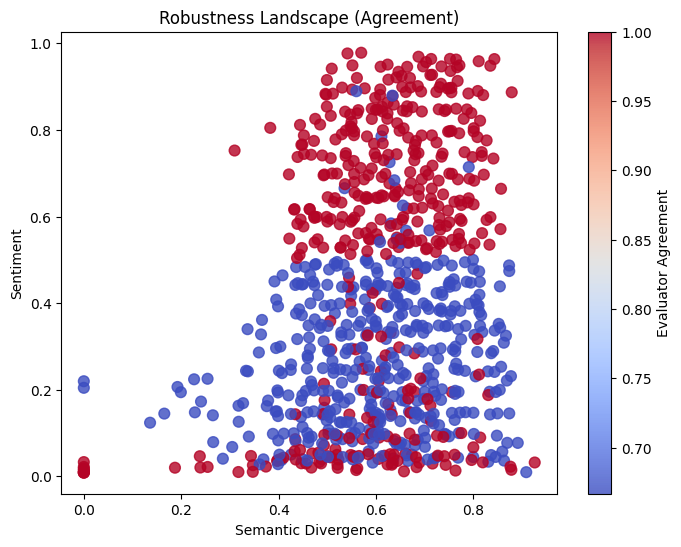

In [27]:
plt.figure(figsize=(8,6))

sc = plt.scatter(
    df_robust["divergence"],
    df_robust["sentiment"],
    c=df_robust["agreement"],
    cmap="coolwarm",
    s=60,
    alpha=0.8
)

plt.colorbar(sc, label="Evaluator Agreement")
plt.xlabel("Semantic Divergence")
plt.ylabel("Sentiment")
plt.title("Robustness Landscape (Agreement)")
plt.show()

In [28]:
print("Corr(divergence, agreement):",
      df_robust["divergence"].corr(df_robust["agreement"]))

print("Corr(sentiment, agreement):",
      df_robust["sentiment"].corr(df_robust["agreement"]))
df_robust["high_div"] = df_robust["divergence"] > 0.8
df_robust.groupby("high_div")["agreement"].mean()

Corr(divergence, agreement): 0.033817425871294486
Corr(sentiment, agreement): 0.4754464352797843


,agreement
high_div,
False,0.833760
True,0.805907


In [29]:
# Determine threshold for top 10%
threshold = df_robust["sentiment"].quantile(0.9)

df_robust["top_10pct"] = df_robust["sentiment"] >= threshold

print("Top 10% threshold:", threshold)

x=df_robust.groupby("top_10pct")["agreement"].mean()
y=df_robust.groupby("top_10pct")["std_posprob"].mean()
print("agreement mean:", x)
print("std mean:",y)

Top 10% threshold: 0.8254414200782776
agreement mean: top_10pct
False    0.813092
True     0.992337
Name: agreement, dtype: float64
std mean: top_10pct
False    0.239702
True     0.062153
Name: std_posprob, dtype: float64


Evolutionary sentiment optimization produces highly robust, evaluator-consistent elites at extreme sentiment levels, while evaluator disagreement concentrates in moderately positive, semantically divergent regions.

In [30]:
from sentiment_lmx.paraphrase_analysis import (
    add_paraphrase_metrics,
    build_paraphrase_shift_df,
    load_paraphraser,
    paraphrase_robustness,
)

para_tok, para_mdl, para_device = load_paraphraser()
from sentiment_lmx.paraphrase_analysis import load_paraphraser
para_tok, para_mdl, para_device = load_paraphraser()


Loading weights:   0%|          | 0/260 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie shared.weight to encoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie shared.weight to decoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


Loading weights:   0%|          | 0/260 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie shared.weight to encoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie shared.weight to decoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


In [14]:
sample_df = df_sentences.sample(5, random_state=42)

for _, row in sample_df.iterrows():
    text = row["sentence"]

    print("="*80)
    print("Original:", text)

    result = paraphrase_robustness(
    text,
    evaluators,
    para_tok,
    para_mdl,
    para_device,
    num_para=3,
)


    if result is None:
        print("No paraphrases generated.")
        continue

    print("Paraphrases:")
    for p in result["paraphrases"]:
        print(" -", p)

    print("\nMetrics:")
    for k, v in result.items():
        if k != "paraphrases":
            print(f"{k:20s}: {v:.3f}")

    print()

Original: Despite the frustration, anger, terrible weather, and industrial smell, I'm grateful for having shelter indoors and for the essential role rabbit-proof fences play in protecting certain areas from.
Paraphrases:
 - Despite the frustration, anger, terrible weather, and industrial smell, I'm grateful for shelter indoors and for the essential role rabbit-proof fences play in protecting certain areas from.
 - Despite frustration, anger, terrible weather, and industrial smell, I'm grateful for having shelter indoors and for the essential role rabbit-proof fences play in protecting certain areas from.

Metrics:
original_mean       : 0.879
para_mean_delta     : 0.010
para_worst_drop     : -0.002
para_std            : 0.008
para_flip_rate      : 0.000

Original: Despite the frustration and anger that come with building and maintaining rabbit-proof fences (A) and the terrible weather filled with an industrial smell from nearby factories (A), the effectiveness of these.
Paraphrases:
 - 

In [15]:
df_robust = add_paraphrase_metrics(
    df_robust,
    evaluators,
    para_tok,
    para_mdl,
    para_device,
    num_para=3,
)


100%|██████████| 66/66 [00:56<00:00,  1.17it/s]


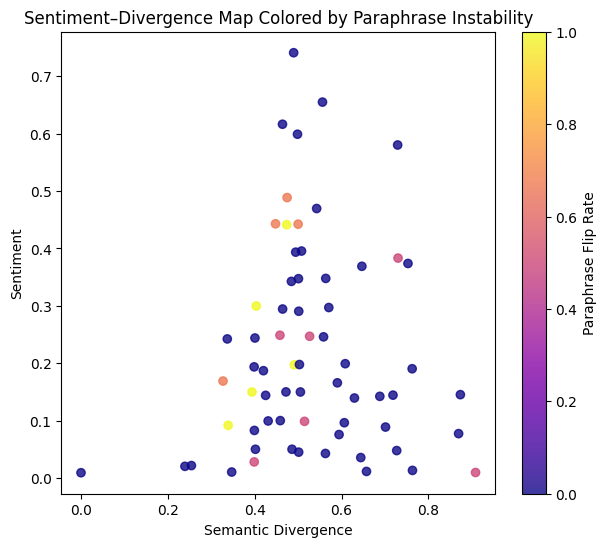

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(
    df_robust["divergence"],
    df_robust["sentiment"],
    c=df_robust["para_flip_rate"],
    cmap="plasma",
    alpha=0.8
)
plt.colorbar(label="Paraphrase Flip Rate")
plt.xlabel("Semantic Divergence")
plt.ylabel("Sentiment")
plt.title("Sentiment–Divergence Map Colored by Paraphrase Instability")
plt.show()

In [17]:
from sentiment_lmx import models

_, _, embed = models.load_default_models()
df_shift = build_paraphrase_shift_df(
    df_sentences,
    root_sentence,
    evaluators,
    para_tok,
    para_mdl,
    para_device,
    embed,
)


In [19]:
print("Mean |Δsentiment|:",
      np.mean(np.abs(df_shift["delta_sentiment"])))

print("Mean |Δdivergence|:",
      np.mean(np.abs(df_shift["delta_divergence"])))

print("Mean 2D displacement:",
      np.mean(df_shift["displacement_2d"]))

Mean |Δsentiment|: 0.324431563280165
Mean |Δdivergence|: 0.032655343
Mean 2D displacement: 0.3409329


In [1]:
plt.figure(figsize=(8,6))

# baseline
plt.scatter(df_sentences["divergence"],
            df_sentences["sentiment"],
            alpha=0.8, label="Baseline")

# paraphrased
plt.scatter(df_shift["para_divergence"],
            df_shift["para_sentiment"],
            alpha=0.3, label="Paraphrased")

plt.xlabel("Semantic Divergence")
plt.ylabel("Sentiment")
plt.title("Baseline vs Paraphrased Landscape")
plt.legend()
plt.show()

NameError: name 'plt' is not defined

We extend MAP-Elites sentiment optimization into a robustness-aware behavioral space and reveal systematic instability in sentiment evaluation under semantic-preserving perturbations.